## Converting MeerKAT observation files to a measurement set
Convertion scripts are installed into the python path by `katdal`   
For all available options: `mvftoms.py -h`

`mvftoms.py ../example-data/1548417874/1548417874/1548417874_sdp_l0.full.rdb -o mkat_cal_im_full.ms -f -a -C '163,3885' --quack=3`     
`mvftoms.py ../example-data/1548417874/1548417874/1548417874_sdp_l0.full.rdb -o mkat_cal_im_section.ms -f -a -C '2150,3150'--quack=3`

**Note: pre-flagging is generally only good to use for continuum imaging and not for spectral lines, since it will flag out the science lines.**   
For imaging the calibrators, we will select to pre-flag the data during conversion.


## Measurement set and CASA

A measurement set is read as a "file" but is represented as a directory containing "tables" with telescope and observation information. A quick way to inspect the format is to list the unpacked directory

In [ ]:
ls ../../example-data/mkat_cal_im_full.ms

**Important: Even though you can access the CASA measurement set as a normal directory with files, NEVER change any of the files or directories inside this measurement set (.ms) directory outside of CASA. This will break the expected structure and CASA will be unable to read and process the data.**

It is customary to refer to CASA measurement sets as "files" with a ".ms" extension

In [1]:
msfile='../../example-data/mkat_cal_im_full.ms'
prefix='../../example-data/mkat_cal_im_full'

Use the `tasklist` command to list available CASA functions.

In [ ]:
print casa['build']['version']

tasklist()

## Observation calibration with CASA

A CASA measurement set contains not only the data of the observation, but also metadata about the observatory, as well as additional info related to the observation that is needed to analyse and calibrate the data. This information can be viewed (compare the output with the `katdal` header display):

In [ ]:
listobs(vis=msfile)

Useful information: targets (fields) observed, and in which spectral windows (Spw). Whether the observation contains a single setup or various spectral resolutions: number channels, total bandwidth, center frequency, correlator product per spectral window. As well as, number of antennas and which antennas was used.

Firstly, try to identify which sources are calibrators and which are targets. This will be indicated in the science proposal, but can also be inferred from the targets. Flux and bandpass calibrators will have only a few observations, gain/phase calibrators will be intermittent with the science observations, but will be observed for shorter intervals and will typically be within 15 degrees of a science target. For flux and bandpass calibrators, only verify that they were up some time during the observation (if more than one select the best one to use). For gain calibrators it is a little more complex, select a calibrator close (approx 15 to 10 degrees) to the target and apply that calibration solution to the target.

Number of points being plotted: 4


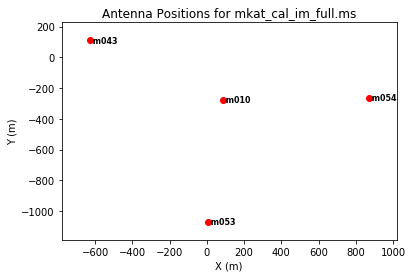

Show log 2019-06-19 10:46:48	INFO	plotants::::	
 2019-06-19 10:46:48	INFO	plotants::::+	##########################################
 2019-06-19 10:46:48	INFO	plotants::::+	##### Begin Task: plotants #####
 2019-06-19 10:46:48	INFO	plotants::::	plotants(vis="../../example-data/mkat_cal_im_full.ms",figfile="",antindex=False,logpos=False,exclude="",
 2019-06-19 10:46:48	INFO	plotants::::+ checkbaselines=False,title="",showgui=True)
 2019-06-19 10:46:48	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on ../../example-data/mkat_cal_im_full.ms...
 2019-06-19 10:46:48	INFO	plotants::::	Number of points being plotted: 4
 2019-06-19 10:46:48	INFO	plotants::::	##### End Task: plotants #####
 2019-06-19 10:46:48	INFO	plotants::::+	##########################################

In [3]:
# antenna positions
plotants(vis=msfile)

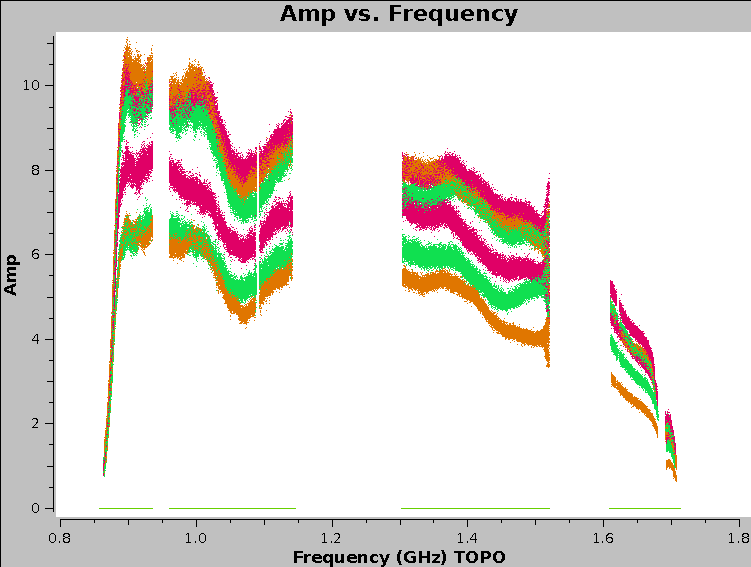

True

Show log 2019-06-19 10:51:18	INFO	plotms::::	
 2019-06-19 10:51:18	INFO	plotms::::+	##########################################
 2019-06-19 10:51:18	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-19 10:51:18	INFO	plotms::::	plotms(vis="../../example-data/mkat_cal_im_full.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-19 10:51:18	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-06-19 10:51:18	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-19 10:51:18	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-19 10:51:18	INFO	plotms::::+ antenna="m010,m043,m053",scan="",correlation="",array="",observation="",
 2019-06-19 10:51:18	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-19 10:51:18	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-19 10:51:18	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-19 10:51:18	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-19 10:51:18	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-19 10:51:18	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-19 10:51:18	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-19 10:51:18	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-19 10:51:18	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-19 10:51:18	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-19 10:51:18	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-19 10:51:18	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-19 10:51:18	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-19 10:51:18	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-19 10:51:18	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-19 10:51:18	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-19 10:51:18	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-19 10:51:18	INFO	PlotMS::load_cache	START Current memory usage: 7946.5 kilobytes.
 2019-06-19 10:51:18	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+ Frame = 
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-19 10:51:18	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-19 10:51:18	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-19 10:51:18	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-06-19 10:51:18	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-19 10:51:18	INFO	PlotMS::load_cache	Data selection will yield a total of 1179648 plottable points (flagged and unflagged).
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.00826013 GB of memory (7.0022 bytes/point).
 2019-06-19 10:51:18	INFO	PlotMS::load_cache+	This is

In [18]:
plotms(vis=msfile, xaxis='freq', yaxis='amp', field='PKS1934-63', coloraxis='baseline', antenna='m010,m043,m053')

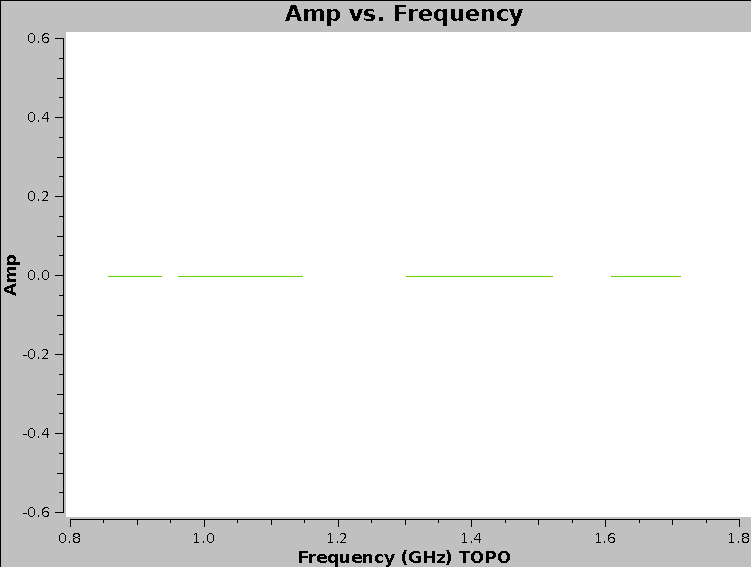

True

Show log 2019-06-19 10:50:51	INFO	plotms::::	
 2019-06-19 10:50:51	INFO	plotms::::+	##########################################
 2019-06-19 10:50:51	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-19 10:50:51	INFO	plotms::::	plotms(vis="../../example-data/mkat_cal_im_full.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-19 10:50:51	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-06-19 10:50:51	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-19 10:50:51	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-19 10:50:51	INFO	plotms::::+ antenna="m054",scan="",correlation="",array="",observation="",
 2019-06-19 10:50:51	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-19 10:50:51	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-19 10:50:51	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-19 10:50:51	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-19 10:50:51	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-19 10:50:51	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-19 10:50:51	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-19 10:50:51	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-19 10:50:51	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-19 10:50:51	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-19 10:50:51	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-19 10:50:51	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-19 10:50:51	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-19 10:50:51	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-19 10:50:51	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-19 10:50:51	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-19 10:50:51	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-19 10:50:51	INFO	PlotMS::load_cache	START Current memory usage: 7936.81 kilobytes.
 2019-06-19 10:50:51	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+ Frame = 
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-19 10:50:51	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-19 10:50:51	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-19 10:50:51	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-06-19 10:50:51	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-19 10:50:51	INFO	PlotMS::load_cache	Data selection will yield a total of 589824 plottable points (flagged and unflagged).
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.00472032 GB of memory (8.00293 bytes/point).
 2019-06-19 10:50:51	INFO	PlotMS::load_cache+	This is 0.028935

In [17]:
plotms(vis=msfile, xaxis='freq', yaxis='amp', field='PKS1934-63', coloraxis='baseline', antenna='m054')

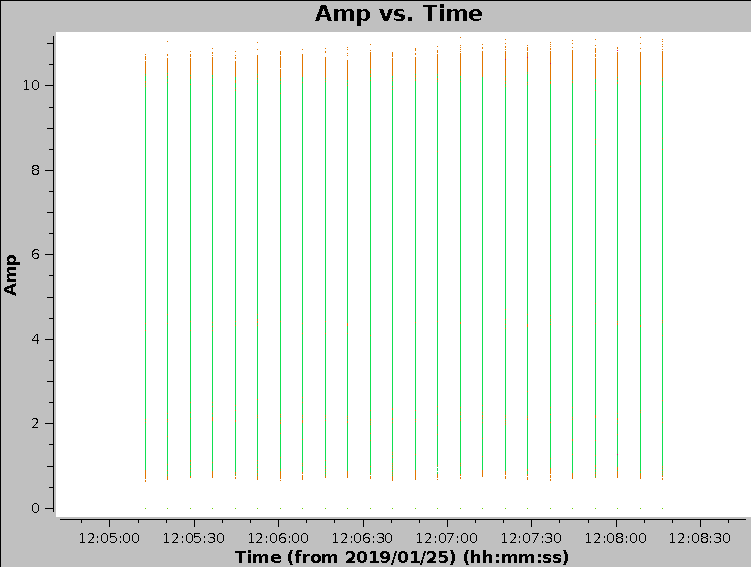

True

Show log 2019-06-19 10:53:36	INFO	plotms::::	
 2019-06-19 10:53:36	INFO	plotms::::+	##########################################
 2019-06-19 10:53:36	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-19 10:53:36	INFO	plotms::::	plotms(vis="../../example-data/mkat_cal_im_full.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-19 10:53:36	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-06-19 10:53:36	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-19 10:53:36	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-19 10:53:36	INFO	plotms::::+ antenna="m010,m043,m053",scan="",correlation="",array="",observation="",
 2019-06-19 10:53:36	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-19 10:53:36	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-19 10:53:36	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-19 10:53:36	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-19 10:53:36	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-19 10:53:36	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-19 10:53:36	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-19 10:53:36	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-19 10:53:36	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-19 10:53:36	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-19 10:53:36	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-19 10:53:36	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-19 10:53:36	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-19 10:53:36	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-19 10:53:36	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-19 10:53:36	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-19 10:53:36	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-19 10:53:36	INFO	PlotMS::load_cache	START Current memory usage: 7957.36 kilobytes.
 2019-06-19 10:53:36	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+ Frame = 
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-19 10:53:36	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-19 10:53:36	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-19 10:53:36	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Time(2)...
 2019-06-19 10:53:36	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-19 10:53:36	INFO	PlotMS::load_cache	Data selection will yield a total of 1179648 plottable points (flagged and unflagged).
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.00826013 GB of memory (7.0022 bytes/point).
 2019-06-19 10:53:36	INFO	PlotMS::load_cache+	This is 0.0

In [19]:
plotms(vis=msfile, xaxis='time', yaxis='amp', field='PKS1934-63', coloraxis='baseline', antenna='m010,m043,m053')

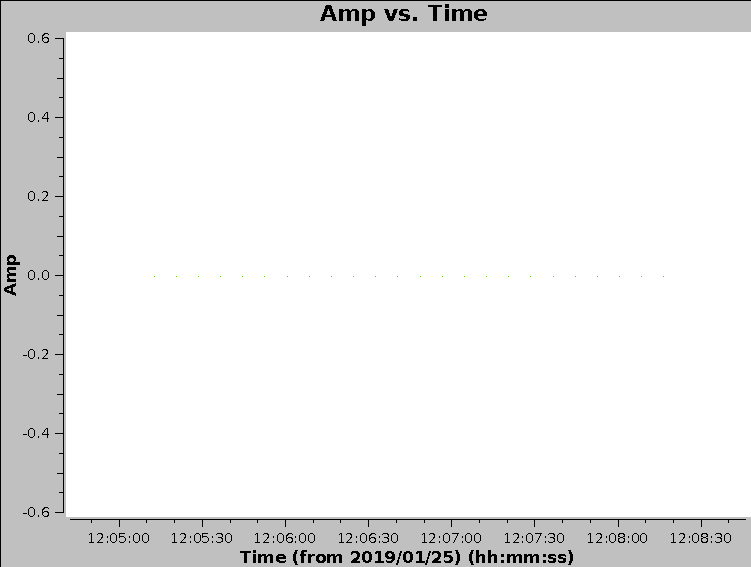

True

Show log 2019-06-19 10:53:58	INFO	plotms::::	
 2019-06-19 10:53:58	INFO	plotms::::+	##########################################
 2019-06-19 10:53:58	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-06-19 10:53:58	INFO	plotms::::	plotms(vis="../../example-data/mkat_cal_im_full.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-06-19 10:53:58	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-06-19 10:53:58	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-06-19 10:53:58	INFO	plotms::::+ selectdata=True,field="PKS1934-63",spw="",timerange="",uvrange="",
 2019-06-19 10:53:58	INFO	plotms::::+ antenna="m054",scan="",correlation="",array="",observation="",
 2019-06-19 10:53:58	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-06-19 10:53:58	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-06-19 10:53:58	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-06-19 10:53:58	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-06-19 10:53:58	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-06-19 10:53:58	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-06-19 10:53:58	INFO	plotms::::+ symboloutline=False,coloraxis="baseline",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-06-19 10:53:58	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-06-19 10:53:58	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-06-19 10:53:58	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-06-19 10:53:58	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-06-19 10:53:58	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-06-19 10:53:58	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-06-19 10:53:58	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-06-19 10:53:58	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-06-19 10:53:58	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-06-19 10:53:58	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-06-19 10:53:58	INFO	PlotMS::load_cache	START Current memory usage: 7977.41 kilobytes.
 2019-06-19 10:53:58	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-06-19 10:53:58	INFO	PlotMS::load_cache+ Frame = 
 2019-06-19 10:53:58	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-06-19 10:53:58	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-06-19 10:53:58	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-06-19 10:53:58	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-06-19 10:53:58	INFO	PlotMS::load_cache+ formStokes = false
 2019-06-19 10:53:58	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-06-19 10:53:58	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-06-19 10:53:58	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-06-19 10:53:58	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-06-19 10:53:58	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Time(2)...
 2019-06-19 10:53:58	INFO	PlotMS::load_cache	Loading page header cache
 2019-06-19 10:53:59	INFO	PlotMS::load_cache	Data selection will yield a total of 589824 plottable points (flagged and unflagged).
 2019-06-19 10:53:59	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.00472032 GB of memory (8.00293 bytes/point).
 2019-06-19 10:53:59	INFO	PlotMS::load_cache+	This is 0.0289354% of

In [20]:
plotms(vis=msfile, xaxis='time', yaxis='amp', field='PKS1934-63', coloraxis='baseline', antenna='m054')

In [ ]:
plotms(vis=msfile, xaxis='time', yaxis='phase', field='PKS1934-63', coloraxis='baseline', avgchannel='3072', plotrange=[0,0,-180,180])

In [ ]:
#plotms(vis=msfile, xaxis='freq', yaxis='amp', field='PKS1934-63', coloraxis='baseline')
plotms(vis=msfile, xaxis='freq', yaxis='phase', field='PKS1934-63', coloraxis='baseline')

In [ ]:
ref_ant = 'm043'

### Inspecting the Data

There may be a few bad points, RFI or system related issues that will affect the calibration and data analysis. It is generally a good idea to spend a little time simply looking at your data before doing anything.

Look for bad antennas, persistently bad channels across all spectral windows, and other clear outliers.  

Once bad data has been identified, it must be flagged out to improve results.   
**Note: initial inspection and flagging are only done using your calibrators, NEVER use the science targets. These will be inspected and flagged after calibration.**

Bad data must be flagged out to improve imaging:
* for calibrator sources -- bad data for the calibrator sources should ideally be removed before determining the calibration solutions
* for other sources -- generally easier to identify bad data after the calibration is applied.

https://casa.nrao.edu/docs/TaskRef/plotms-task.html

Use the `plotms` command and the display window to look at your data from various angles, such as amp/phase vs time/frequency/channel and iterate over antenna/baseline. You can also apply some averaging to get less noisy displays. Usually the best approach is to make several passes through the data using various plotting and listing tools. **During this initial investigation you are only looking at the data, not flagging!** You need to identify bad antennas, baselines and only select those channels that have such persistent, bad outliers that it could skew the calibration results.    

Since calibrator sources are generally point-like, their true visibility amplitude is independent of baseline and time, and the phase should be 0 deg. The data for the initial investigation is uncalibrated, but for point-like sources the uncalibrated visibility amplitude on all baselines should be approximately the same, and the uncalibrated visibility phases should be fairly stable, although not necessarily close to 0 deg.

Good advice is to start with a bandpass (primary) calibrator for inspection. Then confirm bad antenna and channel behaviour using the phase (secondary) calibrators.

Remember: The bandpass (primary) calibrator is a point source that is very stable and well known.

In [ ]:
# looking at amplitude (amp) to identify outliers
#plotms(vis=msfile, xaxis='channel', yaxis='amp', field='PKS1934-63', plotfile='foo.png', coloraxis='baseline')
plotms(vis=msfile, xaxis='channel', yaxis='amp', field='PKS1934-63', coloraxis='baseline')

Viewing amplitude vs channel will show the passband for each target very clearly.

In [ ]:
plotms(vis=msfile, xaxis='freq', yaxis='amp', spw='0', field='PKS1934-63', coloraxis='baseline')

For calibrator sources we expect values that are consistent across baselines and vary only slightly across channels. Thus plot amplitude for all baseline together.   
Bandpass calibrator must have fairly stable amplitude over time.

`avgchannel`: Number of channels to average over, by choosing a value $\geq$ number of channels, data will be averaged over all channels

In [ ]:
plotms(vis=msfile, xaxis='time', yaxis='amp', field='PKS1934-63', coloraxis='baseline', avgchannel='3072')

In [ ]:
plotms(vis=msfile, xaxis='time', yaxis='amp', correlation='XY', field='PKS1934-63', avgchannel='128')

In [ ]:
plotms(vis=msfile, xaxis='time', yaxis='amp', correlation='YX', field='PKS1934-63', avgchannel='1536')

In [ ]:
plotms(vis=msfile,xaxis='u', yaxis='v', coloraxis='field')

If possible flag either all visibilities for some time interval, or all by antenna, rather than flagging individual baselines!    
RFI are channel specific and may not appear in all data sets, these channels has to be flagged on a per baseline basis.

### Calibration

The first stage of data processing in aperture synthesis is to determine the amplitude gain and the phase shift due to each individual antenna (and the atmosphere above it), which together form the complex gain of the antenna.

Various gain calibrator solutions exists
* flux calibration (strong calibrator with known flux): in order to set the flux density scale correctly, use observations of at least one flux density calibrator (can be used for bandpass calibration as well) whose flux density is known -- use one of a few scans and done only once.
* bandpass calibration (strong calibrator source of known spectrum): the bandpass response of the instrument varies across the frequency band, but is fairly stable in time, thus it needs to be solved for only once in an observing run.
* gain/phase calibration (point-like source): the variation in amplitude and phase response as a function of time for calibrators which as known to be point-like sources.


In [ ]:
# define variables that hold the various tables that will be used during the reduction.
btable0 = prefix + '.B0'
gtable0 = prefix + '.G0'
gtable1 = prefix + '.G1'
ktable0 = prefix + '.K0'
ftable1 = prefix + '.fluxscale1'

# Bandpass, gain and flux calibration
f_cal='PKS1934-63'
b_cal='PKS1934-63'
g_cal='PKS1934-63'

Start by re-initializes calibrated visibility data in a given MS and doing basic flagging:    
Create all the columns and tables for the measurement set

In [ ]:
clearcal(msfile)
rmtables(btable0)
rmtables(gtable0)
rmtables(gtable1)
rmtables(ktable0)
rmtables(ftable1)

#### Flagging

Automated flagging for shadowing, elevations below 15 degrees and extreme outliers:

In [ ]:
print('Flagging for shadowing, elevation and extreme outliers')
flagdata(vis=msfile,
         mode='shadow')
# if a Leap second warning is raised, simply run the command again to get rid of the warning

In [ ]:
flagdata(vis=msfile,
         mode='elevation',
         lowerlimit = 15)
flagdata(vis=msfile,
         mode='clip',
         clipminmax = [1e-5, 1000.0]);

In [ ]:
# only for continuum sources (imaging)
flagdata(vis=msfile,
         mode='clip',
         field='',
         clipzeros=True,
         flagbackup=False);

#### Calibrating imaging data
Setting the flux to -1 causes `setjy` to look up the flux density.

In [ ]:
setjy(vis=msfile,
      field=f_cal,
      fluxdensity=-1,
      standard='Perley-Butler 2010')

In [ ]:
rmtables(ktable0)

In [ ]:
gaincal(vis=msfile,
        caltable=ktable0,
        field=f_cal,
        refant=ref_ant,
        spw='0:2150~3150',
        gaintype='G',
        calmode='p',
        combine='scan',
        minblperant=1,
        solnorm=False,
        solint='int',
        minsnr=5)

In [ ]:
gaincal(vis=msfile,
        caltable=ktable0,
        field=f_cal,
        refant='m043',
#        spw='0:2150~3150',
        gaintype='G',
        calmode='p',
#        combine='scan',
        minblperant=1,
#        solnorm=False,
        solint='int',
        minsnr=5)

In [ ]:
#Solving for delays
gaincal(vis=msfile,
        caltable=ktable0,
        field=f_cal,
        gaintype='K',
        solint='inf',
        refant=ref_ant,
        combine='scan',
        minblperant=1,
        solnorm=False,
        spw='0',
        minsnr=5)

In [ ]:
plotcal(caltable=ktable0, xaxis='antenna', yaxis='delay', antenna='')

In [ ]:
gaincal(vis=msfile,
        field=b_cal,
        caltable=gtable0,
        refant=ref_ant,
        calmode='p',
        solint='inf',
        minsnr=5,
        solnorm=True,
        gaintable=ktable0,
        interp='nearest')

In [ ]:
# Solve for the bandpass response -- complex gain as a function of channel across the passband.
bandpass(vis=msfile,
         caltable=btable0,
         field=b_cal,
         refant=ref_ant,
         solnorm=True,
#         combine='scan',
         solint='inf',
         bandtype='B',
         minsnr=5,
         gaintable=[ktable0],
         interp=['nearest', 'nearest'])

In [ ]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       correlation='XX,YY',
#       scan='28',
       field=b_cal,
#       iteraxis='baseline',
#       coloraxis='corr',
       coloraxis='baseline',
       plotrange=[0,0,-180,180])

In [ ]:
plotcal(caltable=btable0, xaxis='chan', yaxis='phase', subplot=321)

#### Apply calibration